直線のあてはめ
===
by ほげにむし

---
$N$個のデータ : $(x_1,y_1), \cdots (x_N, y_N)$ 

---


これによく合う直線をあてはめたい。

正規方程式を使う
---



まずは、データを作ろう

In [1]:
import pandas as pd
import numpy as np
iron_data =pd.DataFrame( {'密度'    :[2.8, 2.9, 3.0, 3.1, 3.2, 3.2, 3.2, 3.3, 3.4], 
                         '鉄含有量':[ 30,  26,  33,  31,  33,  35,  37,  36,  33]})

今回はNumPyの配列を使う。pandasのデータフレームから出てくるのはNumPyの配列である。

一方Pythonで使えるリストの内包表記はリストを返してくるので、array関数でNumPyのarrayに変換する。

In [2]:
x=iron_data['密度'].values
x2=np.array([x**2 for x in iron_data['密度']])
x, x2

(array([ 2.8,  2.9,  3. ,  3.1,  3.2,  3.2,  3.2,  3.3,  3.4]),
 array([  7.84,   8.41,   9.  ,   9.61,  10.24,  10.24,  10.24,  10.89,
         11.56]))

配列の要素が内包表記によって計算され、リストに格納された。for文を使うよりも簡便である。
arrayの要素をすべて足す、sum関数を使ってみよう。

In [3]:
sum(x2)

88.030000000000015

同様に、鉄含有量に対しても配列を求めておく。今度は、NumPyの配列演算機能を使おう。

In [4]:
y= iron_data['鉄含有量'].values
y2=y*y
y, y2

(array([30, 26, 33, 31, 33, 35, 37, 36, 33], dtype=int64),
 array([ 900,  676, 1089,  961, 1089, 1225, 1369, 1296, 1089], dtype=int64))

y*yは各要素を2乗したベクトルになる。内包表記より簡便な書き方になった。

さて、これを使って、正規方程式を記述しよう。
$${\bf A}=\left( 
\begin{array}{ccc}
 \sum_i x_i^2 & \sum_i x_i \\
 \sum_i x_i   & \sum_i 1   \\
\end{array}
\right)
$$
$$ {\bf b} = \left(
\begin{array}{c}
    \sum_i x_iy_i \\
    \sum_i y_i    \\
\end{array} \right)
$$

とすると、

$$ {\bf A} \left( \begin{array}{c} a\\ b\\ \end{array}\right) = {\bf b}$$
を$a$と$b$に関して解けばよいことになる。

まず、行列を作ろう。

In [6]:
A=np.array([[sum(x2), sum(x)], [sum(x), x.shape[0]]])
A
x*y


array([  84. ,   75.4,   99. ,   96.1,  105.6,  112. ,  118.4,  118.8,
        112.2])

x.shape[0]は、xの最初の次元の大きさを意味する。この場合はxの要素数である。
$\sum_i1$を意味することになる。
x
次は、ベクトルである。sum(x*y)で、$\mathbf{x}$、$\mathbf{y}$のそれぞれの要素を乗算してベクトルを求めたのち、
その要素をすべて加算する。

In [7]:
b=np.array([sum(x*y),sum(y)])
b

array([ 921.5,  294. ])

行列$\mathbf{A}$とベクトル$\mathbf{b}$をセットすると、$\mathbf{Ax}=\mathbf{b}$を解き、$\mathbf{x}$を求める関数があるので、それを使おう。

In [8]:
解=np.linalg.solve(A, b)
解

array([ 12.06766917,  -5.0112782 ])

傾きと切片が求まったので、データと一緒にプロットしてみよう。

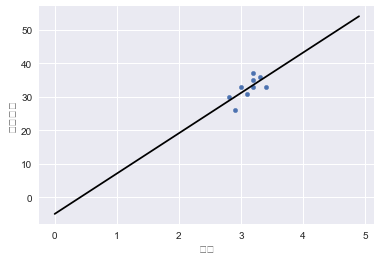

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

iron_data.plot(kind='scatter',x='密度',y='鉄含有量')
inx=np.arange(0, 5, 0.1)
a,b, =解
plt.plot(inx, a*inx+ b, color='k'  )

# まとめ 

正規方程式で問題が解けることを確認するため、
データをNumPyで操作して正規方程式を立て、これを解くことで回帰直線を求めた。